<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **45 to 60** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [ ]:
#!pip install pandas

### Step 1: Import Required Libraries


In [1]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame


#### **Read Data**


If you are using JupyterLite, use the code below to download the dataset into your environment. If you are using a local environment, you can use the direct URL with <code>pd.read_csv()</code>.


In [2]:
#from pyodide.http import pyfetch

#async def download(url, filename):
#    response = await pyfetch(url)
#    if response.status == 200:
#        with open(filename, "wb") as f:
#            f.write(await response.bytes())

# Define the file path for the data
#file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Download the dataset
#await download(file_path, "survey_data.csv")
#file_name = "survey_data.csv"


**Load the data into a pandas dataframe:**


In [3]:
#df = pd.read_csv(file_name)

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


In [7]:
df.shape

(65437, 114)

### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [5]:
# Count the number of duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Display the first few duplicate rows to understand their structure
duplicate_rows = df[df.duplicated()]
print("First few duplicate rows:")
duplicate_rows.head()

Number of duplicate rows: 0
First few duplicate rows:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat


### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [6]:
# Remove duplicate rows
df_unique = df.drop_duplicates()

# Display the shape of the dataset after removal
print(f"Shape of the dataset after removing duplicates: {df_unique.shape}")

Shape of the dataset after removing duplicates: (65437, 114)


In [8]:
# Count duplicates in the new dataset
remaining_duplicates = df_unique.duplicated().sum()

# Verify and print the result
print(f"Number of duplicate rows after removal: {remaining_duplicates}")

Number of duplicate rows after removal: 0


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [9]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a summary table
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Display the summary
missing_summary

,Missing Values,Percentage
AINextMuch less integrated,64289,98.245641
AINextLess integrated,63082,96.401119
AINextNo change,52939,80.900714
AINextMuch more integrated,51999,79.464217
EmbeddedAdmired,48704,74.428840
...,...,...
MainBranch,0,0.000000
Age,0,0.000000
Employment,0,0.000000
Check,0,0.000000


In [10]:
# Check the column with significant missing values
print(df['EdLevel'].value_counts())

# Find the most frequent value (mode)
most_frequent_value = df['EdLevel'].mode()[0]
print(f"The most frequent value in 'EdLevel': {most_frequent_value}")

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64
The most frequent value in 'EdLevel': Bachelor’s degree (B.A., B.S., B.Eng., etc.)


In [11]:
# Impute missing values in 'EdLevel' with the most frequent value
df['EdLevel'].fillna(most_frequent_value, inplace=True)

# Verify if missing values are filled
print(f"Missing values in 'EdLevel' after imputation: {df['EdLevel'].isnull().sum()}")

Missing values in 'EdLevel' after imputation: 0


C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_26724\4065302639.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EdLevel'].fillna(most_frequent_value, inplace=True)


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [13]:
# Check for missing values in 'ConvertedCompYearly'
missing_values = df['ConvertedCompYearly'].isnull().sum()
total_rows = len(df)
missing_percentage = (missing_values / total_rows) * 100

print(f"Missing values in 'ConvertedCompYearly': {missing_values}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Missing values in 'ConvertedCompYearly': 42002
Percentage of missing values: 64.19%


In [14]:
# Calculate the median (or mean) compensation
median_value = df['ConvertedCompYearly'].median()
print(f"Median value of 'ConvertedCompYearly': {median_value}")

# Impute missing values with the median
df['ConvertedCompYearly'].fillna(median_value, inplace=True)

# Verify if missing values are handled
print(f"Missing values after imputation: {df['ConvertedCompYearly'].isnull().sum()}")

Median value of 'ConvertedCompYearly': 65000.0
Missing values after imputation: 0


C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_26724\4256401317.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_value, inplace=True)


In [15]:
# Summary statistics
print(df['ConvertedCompYearly'].describe())

count    6.543700e+04
mean     7.257636e+04
std      1.122207e+05
min      1.000000e+00
25%      6.500000e+04
50%      6.500000e+04
75%      6.500000e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


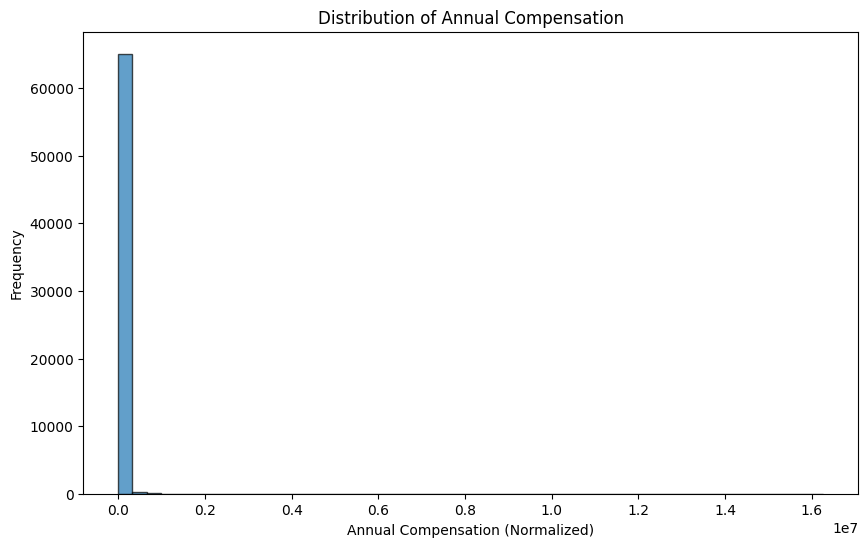

In [17]:
import matplotlib.pyplot as plt

# Histogram of annual compensation
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Annual Compensation')
plt.xlabel('Annual Compensation (Normalized)')
plt.ylabel('Frequency')
plt.show()

### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
